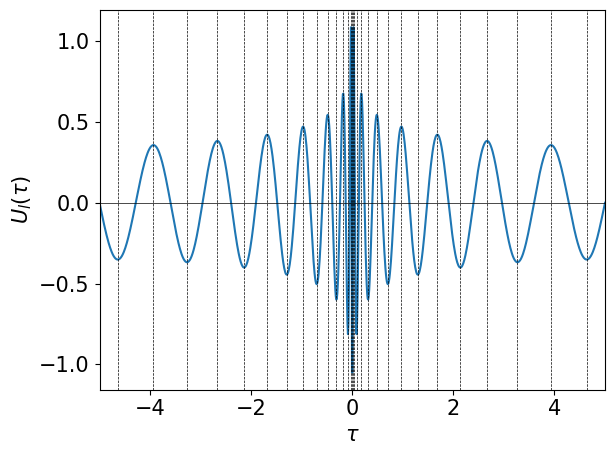

In [1]:
import sparse_ir
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['font.size'] = 15

beta = 10
wmax = 10
basis = sparse_ir.FiniteTempBasis("F", beta, wmax, eps=1e-10)

smpl = sparse_ir.TauSampling(basis)

taus = np.linspace(-beta/2, beta/2, 1000)
plt.plot(taus, basis.u[-1](taus))
plt.plot(taus, np.zeros_like(taus), ls='-', color='k', marker='', lw=0.5)
for x in smpl.sampling_points:
    plt.axvline(x=x, ls='--', lw=0.5, color='k')
plt.xlabel(r'$\tau$')
plt.ylabel(r'$U_l(\tau)$')
plt.xlim([-beta/2, beta/2])
plt.tight_layout()

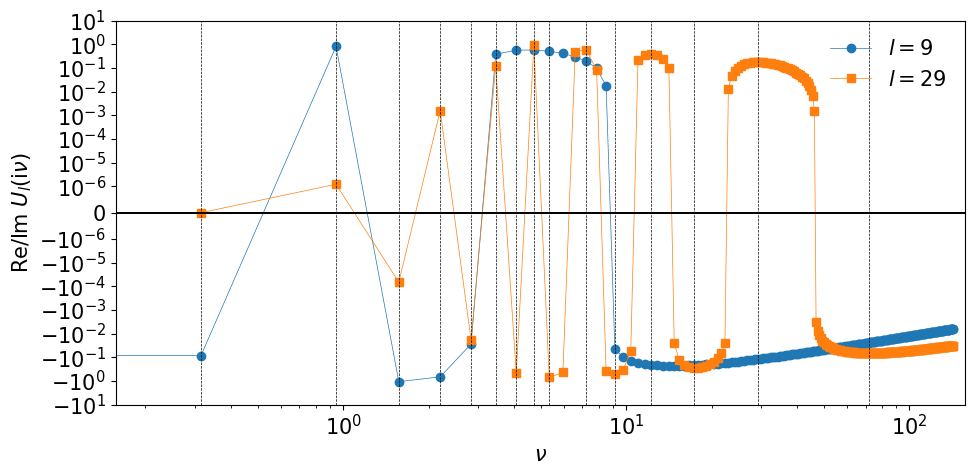

In [2]:
smpl_matsu = sparse_ir.MatsubaraSampling(basis)

get_nonzero_part = lambda l, data: data.imag if l%2==0 else data.real 

fig, ax = plt.subplots(figsize=(10,5))

nmax = int(2*(smpl_matsu.sampling_points.max()//2))
nvec = 2*np.arange(-nmax,nmax)+1
vvec = nvec * np.pi/beta
markers = ["o", "s"]
for idx_l, l in enumerate([9, basis.size-1]):
    ax.plot(vvec, get_nonzero_part(l, basis.uhat[l](nvec)), 
        label=f"$l={l}$", ls="-", marker=markers[idx_l], ms=6, lw=0.5)

for n in smpl_matsu.sampling_points:
    ax.axvline(n*np.pi/beta, ls="--", lw=0.5, color="k")
    ax.axhline(0, ls="-", lw=0.25, color="k")

ax.legend(frameon=False)
ax.set_xlabel(r"$\nu$")
ax.set_ylabel(r"Re/Im $U_l(\mathrm{i}\nu)$")

ax.set_xlim([0.5*np.pi/beta, None])
ax.set_ylim([-10, 10])
ax.set_xscale("log")
ax.set_yscale("symlog", linthresh=1e-6)

plt.tight_layout()

In [3]:
cond_tau = []
cond_matsu = []
lambdas = [1e+1, 1e+2, 1e+3, 1e+4, 1e+5]
for lambda_ in lambdas:
    basis = sparse_ir.FiniteTempBasis("F", beta, lambda_/beta, eps=1e-15)
    cond_tau.append(sparse_ir.TauSampling(basis).cond)
    cond_matsu.append(sparse_ir.MatsubaraSampling(basis).cond)

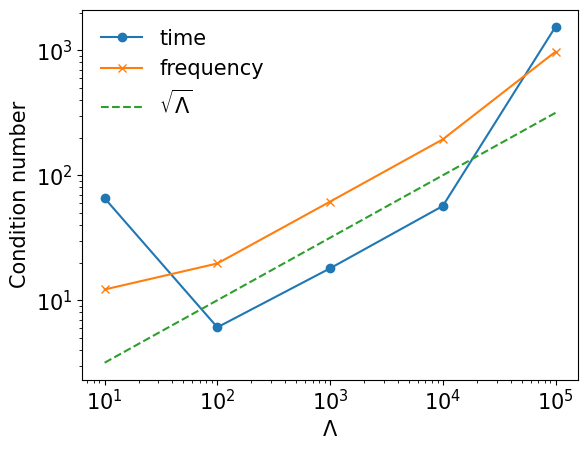

In [4]:
plt.loglog(lambdas, cond_tau, marker="o", label="time")
plt.loglog(lambdas, cond_matsu, marker="x", label="frequency")
plt.loglog(lambdas, np.sqrt(lambdas), marker="", ls="--", label=r"$\sqrt{\Lambda}$")
plt.xlabel(r"$\Lambda$")
plt.ylabel("Condition number")
plt.legend(frameon=False)
plt.show()